In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [10]:
# importing the dataset

In [11]:
data=pd.read_csv(r"C:\Users\filename.csv")

In [12]:
print(data.head())

                    id      conversation_id               created_at  \
0  1522767947059679232  1522767947059679232  2022-05-07 02:39:04 UTC   
1  1522767944815722503  1522754168955367424  2022-05-07 02:39:04 UTC   
2  1522767931448254464  1522767931448254464  2022-05-07 02:39:01 UTC   
3  1522767921906601984  1522767921906601984  2022-05-07 02:38:58 UTC   
4  1522767914746716170  1522767914746716170  2022-05-07 02:38:57 UTC   

         date      time  timezone              user_id        username  \
0  2022-05-07  02:39:04         0            810716666       andychuho   
1  2022-05-07  02:39:04         0            388551191  eduardodllluis   
2  2022-05-07  02:39:01         0  1477474966165614594    soulfullsage   
3  2022-05-07  02:38:58         0  1092853245817602048   kantarokomiya   
4  2022-05-07  02:38:57         0            600415314        corsiar9   

              name place  ... geo source user_rt_id user_rt retweet_id  \
0  Sentinel Seraph   NaN  ... NaN    NaN        

In [13]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [14]:
data=data[["username","tweet","language"]]

In [15]:
#checking for the null values

In [16]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [17]:
#lets see the value counts of tweets posted in different languages

In [18]:
data["language"].value_counts()

en     8805
pt      410
und     170
it      167
es       87
in       66
ja       54
ar       38
ru       38
ca       26
fr       20
de       17
hi       17
zh       15
et       11
nl       10
ro        9
pl        7
fi        7
tl        6
tr        5
cs        5
ko        4
gu        2
ml        2
am        2
da        1
sl        1
no        1
mr        1
te        1
kn        1
ht        1
ur        1
uk        1
th        1
vi        1
eu        1
Name: language, dtype: int64

In [20]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


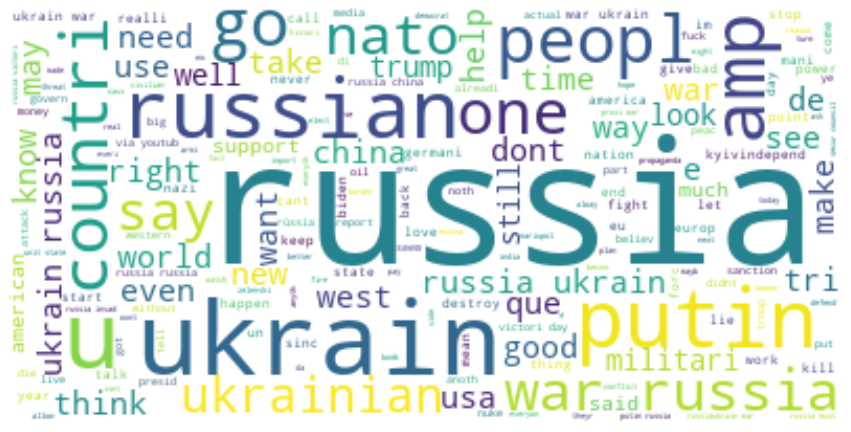

In [27]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#lets add three more columns in the dataset as positive,negative and neutral by calculating the sentiment scores of the tweet.

In [36]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  slavaukraini 🇺🇦   everi time heroofukrain zele...     0.000     0.194   
1   want quieter place live curitiba great place ...     0.375     0.000   
2  absolut propaganda fal alleg saudiarabia reven...     0.072     0.350   
3  russian ambassador japan diplomat moscow alli ...     0.000     0.110   
4  top western media outlet delet video critic uk...     0.113     0.132   

   Neutral  
0    0.806  
1    0.625  
2    0.578  
3    0.890  
4    0.755  


In [ ]:
#lets see the most frequent words used by people with positive sentiments

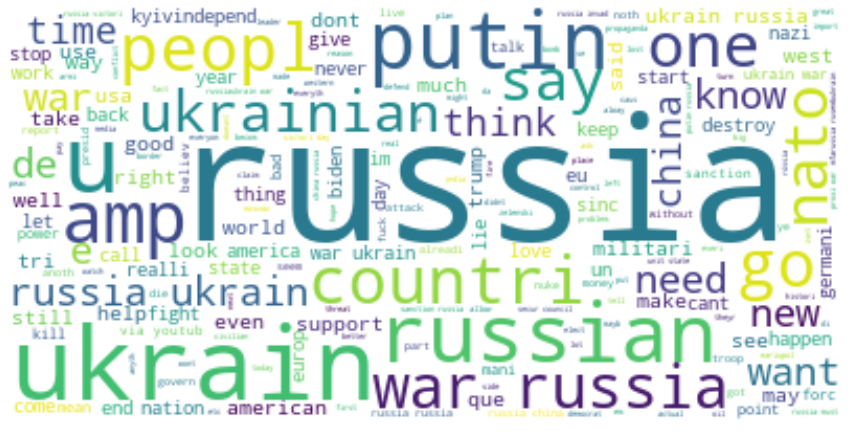

In [40]:
positive = ''.join([i for i in data['tweet'][data['Positive']>data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#lets see the most frequent words used by people with negative sentiments

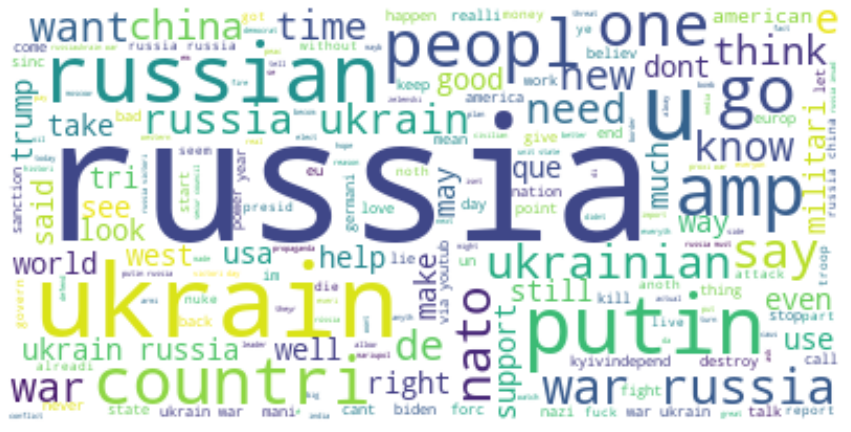

In [44]:
negative = ''.join([i for i in data['tweet'][data['Negative']>data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()